# Biomethane-to-Ammonia - Results visualization

This notebook creates the figures used in the manuscript

In [1]:
%run _imports.ipynb

## Import results files

In [3]:
carbon_footprint_ammonia_RER = pd.read_csv(DATA_DIR / "results" / "Fig 2 Carbon footprint ammonia production Europe average_01-01-2024.csv", index_col=0)
carbon_footprint_ammonia_country = pd.read_csv(DATA_DIR / "results" / "Fig 3 Country-specific carbon footprint ammonia production_03-01-2024.csv", index_col=0)

biomethane_ammonia_potentials = pd.read_csv(DATA_DIR / "results" / "SI Sustainable biomethane potential Europe_03-01-2024.csv", index_col=0)
carbon_footprint_ammonia_industry = pd.read_csv(DATA_DIR / "results" / "SI Carbon footprint ammonia industry Europe_03-01-2024.csv", index_col=0)

netzero_biomethane_blend = pd.read_csv(DATA_DIR / "results" / "Fig 4 Net-zero blending ratios_03-01-2024.csv", index_col=0)

netzero_ammonia_RER_LCIA_relative = pd.read_csv(DATA_DIR / "results" / "Fig 5 LCIA net zero ammonia scenarios relative_03-03-2024.csv", index_col=0)

net_zero_ammonia_RER_costs_2019 = pd.read_excel(DATA_DIR / "results" / "Fig 6 Costs net-zero ammonia scenarios_25-01-2024.xlsx", sheet_name="Summary_2019", index_col=0).fillna(0)
net_zero_ammonia_RER_costs_2022 = pd.read_excel(DATA_DIR / "results" / "Fig 6 Costs net-zero ammonia scenarios_25-01-2024.xlsx", sheet_name="Summary_2022", index_col=0).fillna(0)

# Sensitivity analysis results
perturbation_analysis = pd.read_csv(DATA_DIR / "results" / "SI Perturbation analysis carbon footprint scenario full CCS_23-01-2024.csv", index_col=0)
SA_carbonfootprint_methane_leakage = pd.read_csv(DATA_DIR / "results" / "SI Sensitivity analysis carbon footprint ammonia methane leakage_16-01-2024.csv", index_col=0)
SA_carbonfootprint_upgradingtechnology = pd.read_csv(DATA_DIR / "results" / "SI Sensitivity analysis carbon footprint ammonia upgrading technology_18-01-2024.csv", index_col=0)

SA_carbonfootprint_use = pd.read_csv(DATA_DIR / "results" / "SI Carbon footprint ammonia production Europe average with usage_24-01-2024.csv", index_col=0)

In [3]:
SCENARIO_LABEL = (
                  'Natural gas',
                  'Natural gas + CCS$_{Syngas}$',
                  'Natural gas + CCS$_{Syngas + FlueGas}$',
                  'Green H$_2$',
                  'Biomethane',
                  'Biomethane + CCS$_{Syngas}$',
                  'Biomethane + CCS$_{Syngas + FlueGas}$',
                  'Biomethane + CCS$_{Upgrading}$',
                  'Biomethane + CCS$_{Upgrading + Syngas}$',
                  'Biomethane + CCS$_{Upgrading + Syngas + FlueGas}$'
                 )

NET_ZERO_SCENARIOS = ['Net-zero blue',
                      'Net-zero green',
                      'Net-zero biomethane']

In [4]:
# Figures dimension - Nature standards:
# - length single column figure: 89 mm
# - length 1.5 column figure: 120-136 mm
# - length 2 columns figure: 183 mm
# - max. height figure : 247 mm

fig_length = {1:   3.50394,    # 1 column
              1.5: 5.35433,    # 1.5 columns
              2:   7.20472}    # 2 columns
fig_height = 9.72441 # maxium height

fontsize_title = 9
fontsize_label = 8
fontsize_legend = 8
fontsize_axs = 8

spineline_width = 0.6

### Carbon footprint of ammonia production in Europe with impact breakdown (GWP20 and GWP100)

In [5]:
carbon_footprint_ammonia_RER

,Natural gas,Natural gas + CCS Syngas,Natural gas + CCS Syngas + CCS Heating,Green H2,Biomethane,Biomethane + CCS Syngas,Biomethane + CCS Syngas + CCS Heating,Biomethane + CCS Upgrading,Biomethane + CCS Upgrading + CCS Syngas,Biomethane + CCS Upgrading + CCS Syngas + CCS Heating
Direct emissions,1.417,0.016,0.016,0.008,1.417,0.016,0.016,1.417,0.016,0.016
Feedstock supply chain,0.364,0.364,0.364,0.157,-0.227,-0.227,-0.227,-1.059,-1.059,-1.059
Heating,0.754,0.754,0.313,0.000,0.468,0.468,0.030,0.074,0.074,-0.364
Electricity from grid,0.084,0.159,0.159,0.050,0.084,0.159,0.159,0.084,0.159,0.159
Other,0.066,0.071,0.071,0.065,0.066,0.071,0.071,0.066,0.071,0.071
Total,2.686,1.365,0.924,0.281,1.808,0.487,0.049,0.582,-0.739,-1.177


In [6]:
# Display relative contributions to GWP100
carbon_footprint_ammonia_RER.div(carbon_footprint_ammonia_RER.loc['Total']).multiply(100)

,Natural gas,Natural gas + CCS Syngas,Natural gas + CCS Syngas + CCS Heating,Green H2,Biomethane,Biomethane + CCS Syngas,Biomethane + CCS Syngas + CCS Heating,Biomethane + CCS Upgrading,Biomethane + CCS Upgrading + CCS Syngas,Biomethane + CCS Upgrading + CCS Syngas + CCS Heating
Direct emissions,52.774,1.204,1.779,3.005,78.413,3.376,33.603,243.602,-2.225,-1.397
Feedstock supply chain,13.565,26.687,39.430,55.942,-12.560,-46.615,-464.042,-182.028,143.372,89.999
Heating,28.093,55.268,33.909,0.000,25.874,96.033,60.508,12.728,-10.025,30.934
Electricity from grid,3.123,11.661,17.229,17.765,4.640,32.689,325.410,14.416,-21.551,-13.528
Other,2.444,5.179,7.652,23.288,3.632,14.518,144.521,11.282,-9.571,-6.008
Total,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000


In [7]:
# Reduction of Biomethane scenario over Natural gas scenario
(carbon_footprint_ammonia_RER.loc['Total']['Biomethane'] - carbon_footprint_ammonia_RER.loc['Total']['Natural gas']) * 100 / carbon_footprint_ammonia_RER.loc['Total']['Natural gas']

-32.69768035032988

In [8]:
def fig_impact_contribution_ammonia(axs, data_to_plot, x_label, x_limits, fig_name):
    params = {'mathtext.default': 'regular' }
    plt.rcParams.update(params)
    contrib_color = ['darkslateblue', '#8073ac', '#b2abd2', '#fdb863', '#b2182b']
    width = 0.85

    # Impact contribution
    data_to_plot.iloc[:5].T.plot.barh(stacked=True, ax=axs, width=width, fontsize=fontsize_axs, color=contrib_color, linewidth=spineline_width, legend=False, zorder=2)

    # Total impact
    marker_style = '*'
    marker_color = 'yellow'
    marker_size = 9
    axs.plot(data_to_plot.T['Total'], data_to_plot.T.index, zorder=3, marker=marker_style, mfc=marker_color, mec='black', ms=9, mew=0.3, ls='None', lw=0.5)

    axs.invert_yaxis()
    labels = [item.get_text() for item in axs.get_yticklabels()]
    labels = SCENARIO_LABEL
    axs.set_yticklabels(labels)
    axs.set_xlabel(x_label, fontsize=fontsize_label) 
    axs.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

    axs.axvline(x=0, ls='-', color='black', lw=0.8, zorder=2)
    axs.tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
    axs.tick_params(axis='x', which='major', direction='in', length=4, labelsize=fontsize_axs)
    axs.set_xlim(x_limits[0], x_limits[1])

    axs.grid(ls='--', lw=0.5, zorder=0)

    # Legend
    handles, labels = axs.get_legend_handles_labels()
    patch_1 = Line2D([0], [0], color=marker_color, ls='None', mec='black', mew=0.3, marker=marker_style, ms=marker_size)
    handles.append(patch_1)
    labels.append('Total / Cradle-to-Gate')
    axs.legend(handles=handles, labels=labels, bbox_to_anchor=(0.95,-0.2), ncol=3, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

    plt.savefig(FIG_EXPORT_DIR / (fig_name + ".jpg"), dpi=600, bbox_inches='tight')
    plt.savefig(FIG_EXPORT_DIR / (fig_name + ".pdf"), dpi=600, bbox_inches='tight')

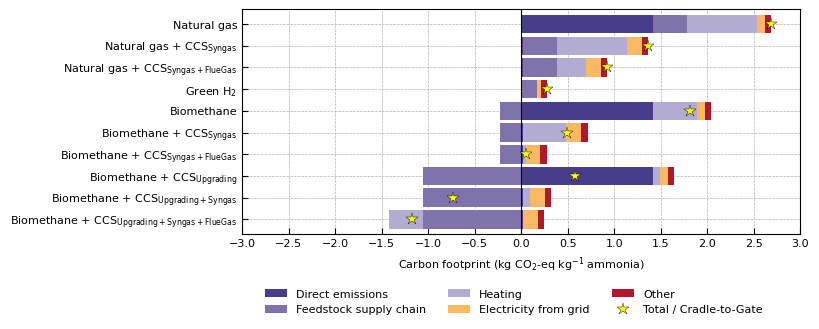

In [9]:
# Carbon footprint ammonia production RER - GWP100a
fig, axs = plt.subplots(1, 1, figsize=(fig_length[2], fig_height*0.3), zorder=3)
x_label = 'Carbon footprint (kg CO$_2$-eq kg$^{-1}$ ammonia)'
x_limits = (-3, 3)
fig_name = 'fig2_ammonia_RER_GWP100'
fig_impact_contribution_ammonia(axs, carbon_footprint_ammonia_RER, x_label, x_limits, fig_name)

### Country-specific carbon footprint of ammonia production from biomethane across Europe (GWP100)

In [10]:
carbon_footprint_ammonia_country

,Biomethane,Biomethane + CCS Syngas,Biomethane + CCS Syngas + CCS Heating,Biomethane + CCS Upgrading,Biomethane + CCS Upgrading + CCS Syngas,Biomethane + CCS Upgrading + CCS Syngas + CCS Heating
DE,1.843,0.545,0.137,0.646,-0.652,-1.060
FR,1.605,0.228,-0.266,0.326,-1.052,-1.546
IT,2.065,0.754,0.330,0.853,-0.458,-0.882
ES,1.729,0.390,-0.066,0.485,-0.853,-1.310
PL,2.395,1.201,0.879,1.281,0.087,-0.235
GB,1.645,0.312,-0.140,0.407,-0.927,-1.378
RO,1.823,0.515,0.086,0.605,-0.702,-1.132
NL,1.660,0.366,-0.043,0.462,-0.832,-1.241
HU,1.910,0.599,0.170,0.693,-0.618,-1.047
DK,1.743,0.395,-0.070,0.491,-0.857,-1.322


In [11]:
# Min and max carbon footprint under full CCS implementation
print(carbon_footprint_ammonia_country[["Biomethane + CCS Upgrading + CCS Syngas + CCS Heating"]].idxmin().values,
      carbon_footprint_ammonia_country[["Biomethane + CCS Upgrading + CCS Syngas + CCS Heating"]].min().values)

print(carbon_footprint_ammonia_country[["Biomethane + CCS Upgrading + CCS Syngas + CCS Heating"]].idxmax().values,
      carbon_footprint_ammonia_country[["Biomethane + CCS Upgrading + CCS Syngas + CCS Heating"]].max().values)

['SE'] [-2.03721321]
['PL'] [-0.23494124]


In [12]:
# Carbon footprint of ammonia producers under full CCS implementation
carbon_footprint_ammonia_country.loc[['DE', 'LT', 'FR', 'SK', 'RO', 'ES']]["Biomethane + CCS Upgrading + CCS Syngas + CCS Heating"]

DE   -1.060
LT   -1.067
FR   -1.546
SK   -1.091
RO   -1.132
ES   -1.310
Name: Biomethane + CCS Upgrading + CCS Syngas + CCS Heating, dtype: float64

In [13]:
# Carbon negative ammonia under partial CCS implementation
print(carbon_footprint_ammonia_country[["Biomethane + CCS Syngas"]][(carbon_footprint_ammonia_country[["Biomethane + CCS Syngas"]] < 0).all(1)])
print(carbon_footprint_ammonia_country[["Biomethane + CCS Syngas"]][(carbon_footprint_ammonia_country[["Biomethane + CCS Upgrading"]] < 0).all(1)])

    Biomethane + CCS Syngas
SE                   -0.248
FI                   -0.127
CH                   -0.048
    Biomethane + CCS Syngas
SE                   -0.248
FI                   -0.127


In [14]:
# Number of countries require CCS implementation only at the ammonia plant
print(len(carbon_footprint_ammonia_country[["Biomethane + CCS Syngas + CCS Heating"]][(carbon_footprint_ammonia_country[["Biomethane + CCS Syngas + CCS Heating"]] < 0).all(1)]))

13


In [15]:
# Create a dataframe with spatial data and impacts per country
data_regional = results_analysis.impacts_geo_data(carbon_footprint_ammonia_country)
data_regional.head()

c:\Users\istrateir\OneDrive - Universiteit Leiden\Research\biomethane_to_ammonia\src\results_analysis.py:184: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,Biomethane,Biomethane + CCS Syngas,Biomethane + CCS Syngas + CCS Heating,Biomethane + CCS Upgrading,Biomethane + CCS Upgrading + CCS Syngas,Biomethane + CCS Upgrading + CCS Syngas + CCS Heating
0,5347896.000,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",NO,1.482,0.093,-0.411,0.192,-1.196,-1.700
1,67059887.000,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FR,1.605,0.228,-0.266,0.326,-1.052,-1.546
2,10285453.000,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",SE,1.139,-0.248,-0.750,-0.149,-1.535,-2.037
3,37970874.000,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",PL,2.395,1.201,0.879,1.281,0.087,-0.235
4,8877067.000,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",AT,1.610,0.272,-0.184,0.368,-0.971,-1.427


In [16]:
def fig_regional_impact(data, scenario, axs, vmin, vmax, color_map):
    # Create map figure:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=axs, color='white', edgecolor='dimgrey', linewidths=0.2)
    # Adjust to Europe coordinates
    axs.set_xlim(-13, 33)
    axs.set_ylim(33, 73)
    # Plot data
    data.plot(scenario, ax=axs, cmap=color_map, edgecolor='dimgrey', linewidths=0.2, alpha=0.7, vmin=vmin, vmax=vmax)
    axs.set_yticklabels('')
    axs.set_xticklabels('')
    axs.tick_params(axis='x', which='major', length=0)
    axs.tick_params(axis='y', which='major', length=0)

C:\Users\istrateir\AppData\Local\Temp\ipykernel_36780\2862803206.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\istrateir\AppData\Local\Temp\ipykernel_36780\2862803206.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\istrateir\AppData\Local\Temp\ipykernel_36780\2862803206.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultur

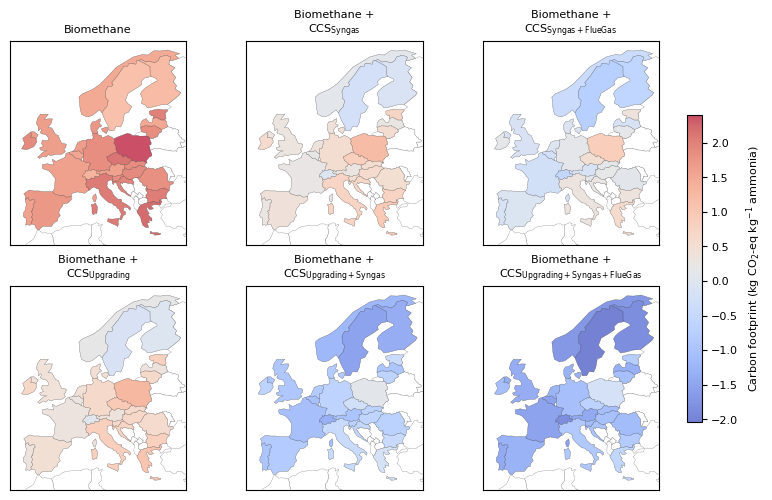

In [18]:
SCENARIOS = list(carbon_footprint_ammonia_country.columns)

SCENARIO_LABEL_MAPS = ['Biomethane',
                       'Biomethane +\nCCS$_{Syngas}$',
                       'Biomethane +\nCCS$_{Syngas + FlueGas}$',
                       'Biomethane +\nCCS$_{Upgrading}$',
                       'Biomethane +\nCCS$_{Upgrading + Syngas}$',
                       'Biomethane +\nCCS$_{Upgrading + Syngas + FlueGas}$'
                      ]
color_map = 'coolwarm'

fig, axs = plt.subplots(2, 3, figsize=(fig_length[2]*1.2, fig_height*0.6), zorder=3)

vmin = carbon_footprint_ammonia_country.min().min()
vmax = carbon_footprint_ammonia_country.max().max()


count_col = 0
count_rows = 0
for scenario in range(len(SCENARIOS)):
    fig_regional_impact(data_regional, SCENARIOS[scenario], axs[count_rows,count_col], vmin, vmax, color_map)
    axs[count_rows,count_col].set_title(SCENARIO_LABEL_MAPS[scenario], loc='center', fontsize=fontsize_axs)
    count_col += 1
    if scenario == 2:
        count_col = 0
        count_rows = 1

axins1 = inset_axes(axs[1,2], width="10%", height="100%", loc='lower center', bbox_to_anchor=(0.8,0.3,0.8,1.5), bbox_transform=axs[1,2].transAxes)
sm = plt.cm.ScalarMappable(cmap=color_map,  norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = axs[1,2].figure.colorbar(sm, alpha=0.7, cax=axins1, orientation="vertical")
cbar.ax.tick_params(labelsize=fontsize_axs)
cbar.set_label('Carbon footprint (kg CO$_2$-eq kg$^{-1}$ ammonia)', rotation=90, loc='center', fontsize=fontsize_label)

plt.savefig(FIG_EXPORT_DIR / 'fig3_ammonia_country_GWP100.jpg', dpi=600, bbox_inches='tight')
plt.savefig(FIG_EXPORT_DIR / 'fig3_ammonia_country_GWP100.pdf', dpi=600, bbox_inches='tight')

### Biomethane and ammonia production potentials in Europe

In [24]:
biomethane_ammonia_potentials.reindex(sorted(biomethane_ammonia_potentials.index, key='Total'.__eq__)).round(2)

,Biomethane potential,Ammonia potential,Ammonia production,Biomethane for ammonia production,Share biomethane for ammonia production
name,,,,,
Germany,7.770,6.990,2.290,2.060,26.450
France,6.660,5.990,0.570,0.510,7.650
Italy,5.510,4.950,NaN,NaN,NaN
Spain,3.800,3.410,0.300,0.270,7.140
Poland,3.070,2.760,2.070,1.860,60.650
United Kingdom,3.020,2.710,NaN,NaN,NaN
Romania,1.850,1.670,0.360,0.330,17.540
Netherlands,1.300,1.170,NaN,NaN,NaN
Hungary,0.980,0.880,NaN,NaN,NaN


In [25]:
biomethane_ammonia_potentials.loc['Total']['Ammonia potential'] / biomethane_ammonia_potentials.loc['Total']['Ammonia production']

3.326647783906312

In [27]:
# Carbon footprint of the EU ammonia industry under each scenario (based on 2021 production volumes)
carbon_footprint_ammonia_industry.round(2)

,Total
Natural gas,30.330
Natural gas + CCS Syngas,15.420
Natural gas + CCS Syngas + CCS Heating,10.440
Green H2,3.170
Biomethane,20.410
Biomethane + CCS Syngas,5.500
Biomethane + CCS Syngas + CCS Heating,0.550
Biomethane + CCS Upgrading,6.570
Biomethane + CCS Upgrading + CCS Syngas,-8.340
Biomethane + CCS Upgrading + CCS Syngas + CCS Heating,-13.290


### Blending strategy for net-zero ammonia

In [19]:
netzero_biomethane_blend

,Biomethane,Biomethane + CCS Syngas,Biomethane + CCS Syngas + CCS Heating,Biomethane + CCS Upgrading,Biomethane + CCS Upgrading + CCS Syngas,Biomethane + CCS Upgrading + CCS Syngas + CCS Heating
Europe,NaN,NaN,NaN,NaN,64.888,43.983
Germany,NaN,NaN,NaN,NaN,68.246,48.189
France,NaN,NaN,75.084,NaN,54.988,34.163
Italy,NaN,NaN,NaN,NaN,76.516,55.881
Spain,NaN,NaN,93.836,NaN,62.541,43.524
Poland,NaN,NaN,NaN,NaN,NaN,86.488
United Kingdom,NaN,NaN,82.807,NaN,56.329,32.807
Romania,NaN,NaN,NaN,NaN,65.154,42.711
Netherlands,NaN,NaN,94.494,NaN,59.830,37.471
Hungary,NaN,NaN,NaN,NaN,72.163,54.850


In [22]:
def blend_ratios_df(data, scenario):
    data_scenario = data[[scenario]].rename(columns={scenario: 'Biomethane blend ratio'})
    data_scenario['Natural gas blend ratio'] = 100 - data_scenario[['Biomethane blend ratio']]

    data_scenario = data_scenario.sort_values('Biomethane blend ratio')
    data_scenario = pd.concat([data_scenario.loc[['Europe']], data_scenario.drop('Europe', axis=0)], axis=0)
    blank_row = pd.DataFrame([[None]*len(data_scenario.columns)], columns=data_scenario.columns)
    data_scenario = pd.concat([data_scenario.iloc[:1], blank_row, data_scenario.iloc[1:]])

    return data_scenario
    

def biomethane_blend_fig(df_to_plot, fig_name):    
    width=0.85

    fig, axs = plt.subplots(1, 1, figsize=(fig_length[2]*1.1, fig_height*0.4), zorder=3)
    
    # Biomethane blend ratio
    df_to_plot.plot.bar(ax=axs, stacked=True, width=width, fontsize=fontsize_axs, color=['green', 'silver'], linewidth=spineline_width, legend=False, zorder=2)

    axs.tick_params(axis='x', which='major', direction='out', length=4, labelsize=fontsize_axs)
    axs.set_xticks([0] + list(range(2, len(df_to_plot.index))))
    axs.set_xticklabels([df_to_plot.index[0]] + list(df_to_plot.index[2:]), rotation = 45, ha="right", fontsize=fontsize_axs)

    axs.tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
    axs.tick_params(axis='y', which='minor', direction='in', length=2, labelsize=fontsize_axs)

    axs.set_ylim(0, 100)
    axs.set_ylabel('Blend ratio (%)', fontsize=fontsize_label)

    axs.grid(ls='--', lw=0.5, zorder=0)

    # LEGEND
    patch_1 = Patch(facecolor='silver', edgecolor='grey', label='Biomethane blend ratio for net-zero ammonia')

    axs.legend(loc='upper right', ncol=1, frameon=True, edgecolor='white',  facecolor='white', fontsize=fontsize_legend)

    plt.savefig(FIG_EXPORT_DIR / (fig_name + ".jpg"), dpi=600, bbox_inches='tight')
    plt.savefig(FIG_EXPORT_DIR / (fig_name + ".pdf"), dpi=600, bbox_inches='tight')

In [21]:
blend_ratios_full_ccs = blend_ratios_df(netzero_biomethane_blend, 'Biomethane + CCS Upgrading + CCS Syngas + CCS Heating')
blend_ratios_full_ccs

,Biomethane blend ratio,Natural gas blend ratio
Europe,43.983,56.017
0,NaN,NaN
Norway,14.410,85.590
Sweden,16.163,83.837
Denmark,29.125,70.875
Switzerland,29.422,70.578
Belgium,32.223,67.777
United Kingdom,32.807,67.193
France,34.163,65.837
Ireland,35.385,64.615


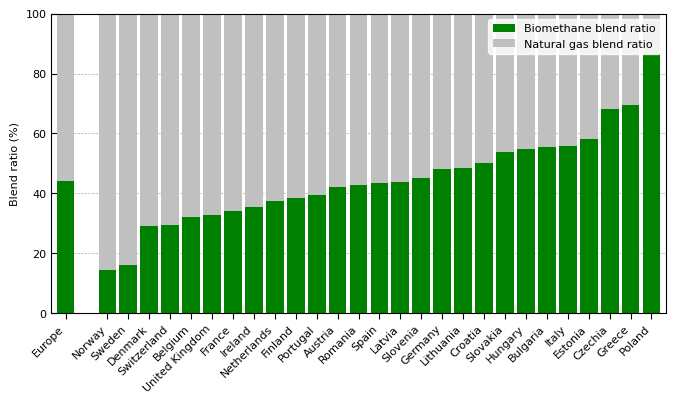

In [23]:
fig_name = "fig4_blend_ratio_full_ccs"
biomethane_blend_fig(blend_ratios_full_ccs, fig_name)

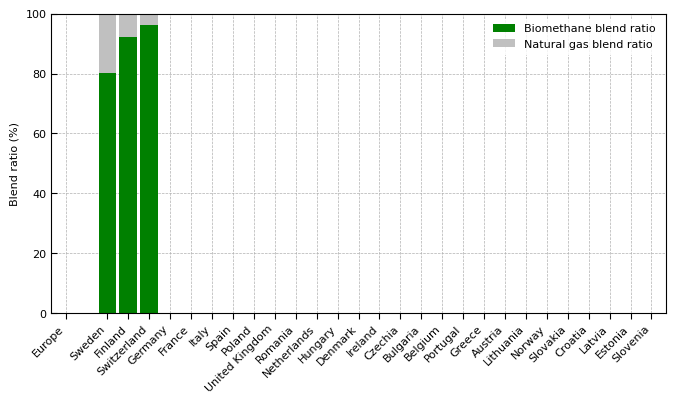

In [34]:
blend_ratios_syngas_ccs = blend_ratios_df(netzero_biomethane_blend, 'Biomethane + CCS Syngas')

fig_name = "SI_blend_ratio_syngas_ccs.jpg"
biomethane_blend_fig(blend_ratios_syngas_ccs, fig_name)

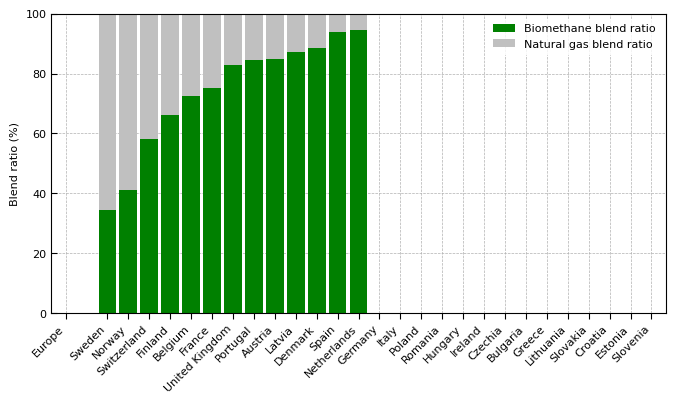

In [35]:
blend_ratios_upgrd_syngas_fluegas_ccs = blend_ratios_df(netzero_biomethane_blend, 'Biomethane + CCS Syngas + CCS Heating')

fig_name = "SI_blend_ratio_syngas_fluegas_ccs.jpg"
biomethane_blend_fig(blend_ratios_upgrd_syngas_fluegas_ccs, fig_name)

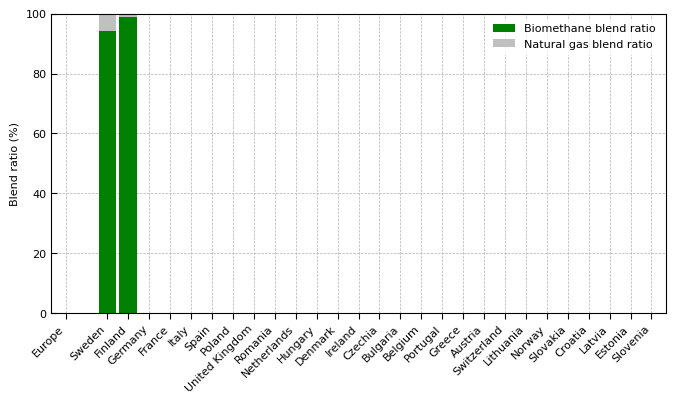

In [36]:
blend_ratios_upgrd_upgrd_ccs = blend_ratios_df(netzero_biomethane_blend, 'Biomethane + CCS Upgrading')

fig_name = "SI_blend_ratio_upgrd_ccs.jpg"
biomethane_blend_fig(blend_ratios_upgrd_upgrd_ccs, fig_name)

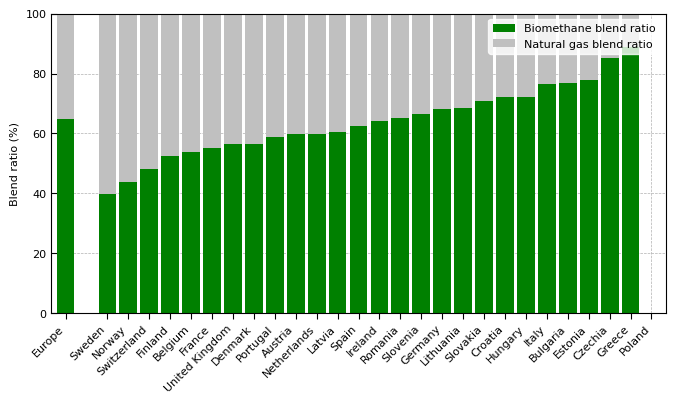

In [37]:
blend_ratios_upgrd_syngas_ccs = blend_ratios_df(netzero_biomethane_blend, 'Biomethane + CCS Upgrading + CCS Syngas')

fig_name = "SI_blend_ratio_upgrd_syngas_ccs.jpg"
biomethane_blend_fig(blend_ratios_upgrd_syngas_ccs, fig_name)

In [38]:
# Compute biomethane requirements for net-zero ammonia
NG_CONSUMPTION_AMMONIA = 0.898843401

blend_ratio_netzero = blend_ratios_full_ccs[["Biomethane blend ratio"]]
blend_ratio_netzero.rename(index={'Europe': 'Total'}, inplace=True)
blend_ratio_netzero = blend_ratio_netzero.drop(0)

biomethane_vol_for_netzero = biomethane_ammonia_potentials['Ammonia production'] * NG_CONSUMPTION_AMMONIA * blend_ratio_netzero['Biomethane blend ratio'] / 100
biomethane_share_for_netzero = biomethane_vol_for_netzero * 100 / biomethane_ammonia_potentials['Biomethane potential']

biomethane_for_netzero_results = pd.DataFrame({'Ammonia production': biomethane_ammonia_potentials['Ammonia production'],
                                               'Biometane blend ratio for net-zero': blend_ratio_netzero['Biomethane blend ratio'],
                                               'Biomethane vol demand for net-zero': biomethane_vol_for_netzero,
                                               'Biomethane share demand for net-zero': biomethane_share_for_netzero})

biomethane_for_netzero_results.dropna(subset=biomethane_for_netzero_results.columns)

C:\Users\istrateir\AppData\Local\Temp\ipykernel_31488\1285973597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blend_ratio_netzero.rename(index={'Europe': 'Total'}, inplace=True)


,Ammonia production,Biometane blend ratio for net-zero,Biomethane vol demand for net-zero,Biomethane share demand for net-zero
Croatia,0.236,50.241,0.107,52.329
France,0.567,34.163,0.174,2.614
Germany,2.288,48.189,0.991,12.748
Lithuania,0.716,48.307,0.311,85.006
Poland,2.071,86.488,1.610,52.458
Romania,0.362,42.711,0.139,7.491
Slovakia,0.493,53.749,0.238,86.342
Spain,0.302,43.524,0.118,3.110
Total,11.294,43.983,4.465,10.682


In [43]:
# Save results to csv
biomethane_for_netzero_results.to_csv(DATA_DIR / "results" / f"Table S4 Biomethane blend ratio for net-zero ammonia industry_{datetime.datetime.today().strftime('%d-%m-%Y')}.csv")

In [39]:
biomethane_for_netzero_results.loc['Total']["Biomethane vol demand for net-zero"] / 35

0.12757203702272846

### Life cycle impact assessment of net-zero ammonia production

In [24]:
netzero_ammonia_RER_LCIA_relative

,Category,Total,Ammonia production from natural gas with CCS,DACCS,Ammonia production from green H2,Ammonia production from biomethane with CCS
Scenario,,,,,,
Natural gas + CCS Syngas + CCS Heating,Acidification,0.904,0.662,0.242,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,"Eutrophication, freshwater",1.000,0.326,0.674,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,"Eutrophication, marine",0.635,0.427,0.208,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,"Eutrophication, terrestrial",0.736,0.639,0.097,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,Photochemical oxidant formation,0.153,0.114,0.039,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,Particulate matter formation,0.765,0.617,0.148,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,Ozone depletion,1.000,0.898,0.102,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,"Ecotoxicity, freshwater",1.000,0.626,0.374,NaN,NaN
Natural gas + CCS Syngas + CCS Heating,"Human toxicity, carcinogenic",0.883,0.583,0.300,NaN,NaN


In [25]:
def extract_level_for_contribution(df, scenario, level):
    return df.loc[scenario][['Category', level]].reset_index().drop(['Scenario'], axis=1).set_index('Category').rename(columns = {level: scenario})

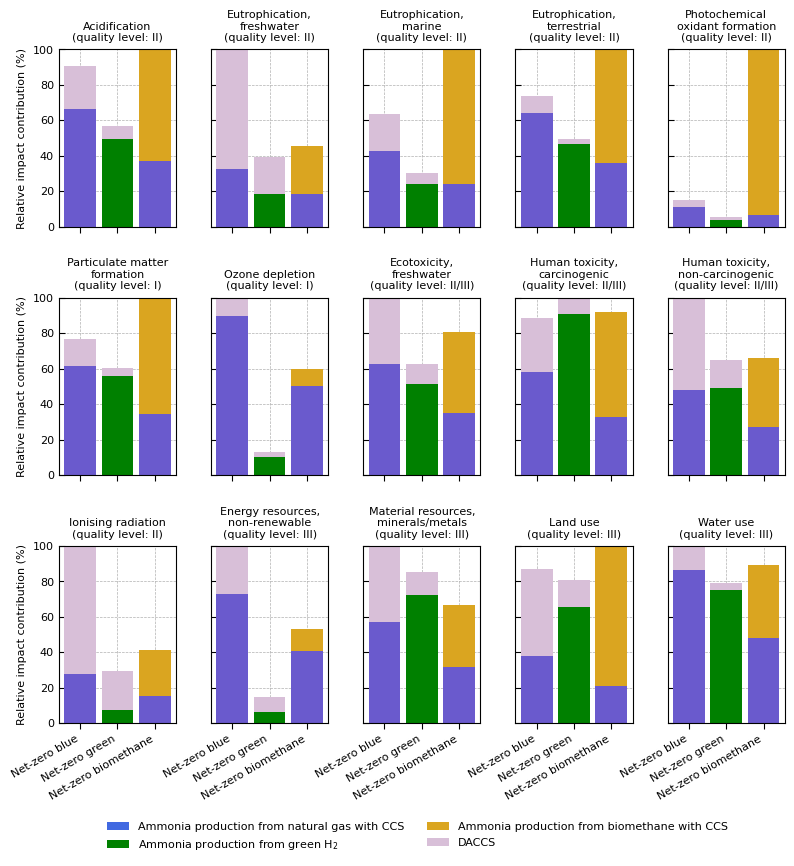

In [27]:
width = 0.85

IMPACT_TITLES = ['Acidification\n(quality level: II)',
                 'Eutrophication,\nfreshwater\n(quality level: II)',
                 'Eutrophication,\nmarine\n(quality level: II)',
                 'Eutrophication,\nterrestrial\n(quality level: II)',
                 'Photochemical\noxidant formation\n(quality level: II)',
                 'Particulate matter\nformation\n(quality level: I)',
                 'Ozone depletion\n(quality level: I)',
                 'Ecotoxicity,\nfreshwater\n(quality level: II/III)',
                 'Human toxicity,\ncarcinogenic\n(quality level: II/III)',
                 'Human toxicity,\nnon-carcinogenic\n(quality level: II/III)',
                 'Ionising radiation\n(quality level: II)',
                 'Energy resources,\nnon-renewable\n(quality level: III)',
                 'Material resources,\nminerals/metals\n(quality level: III)',
                 'Land use\n(quality level: III)',
                 'Water use\n(quality level: III)']


fig, axs = plt.subplots(3, 5, figsize=(fig_length[2]*1.3, fig_height*0.9), sharey=True, sharex=True, zorder=3)

impact_count = 0
for row in range(3):
    axs[row,0].set_ylabel('Relative impact contribution (%)', fontsize=fontsize_label)
    for col in range(5):
        
        # Plot data
        level_1_df = pd.concat([extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Natural gas + CCS Syngas + CCS Heating', 'Ammonia production from natural gas with CCS'),
                        extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Green H2', 'Ammonia production from green H2'),
                        extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Blending strategy', 'Ammonia production from natural gas with CCS'),
                      ], axis=1)
        level_2_df = pd.concat([extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Natural gas + CCS Syngas + CCS Heating', 'DACCS'),
                        extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Green H2', 'DACCS'),
                        extract_level_for_contribution(netzero_ammonia_RER_LCIA_relative, 'Blending strategy', 'Ammonia production from biomethane with CCS'),
                      ], axis=1)
        
        axs[row,col].bar([0,1,2], level_1_df.iloc[impact_count].multiply(100),
                         width=width, color=['slateblue', 'green', 'slateblue'], linewidth=spineline_width, zorder=2)
        
        axs[row,col].bar([0,1,2], level_2_df.iloc[impact_count].multiply(100), 
                         width=width, color=['thistle', 'thistle', 'goldenrod'], linewidth=spineline_width, zorder=2,
                         bottom=level_1_df.iloc[impact_count].multiply(100))
        
        axs[row,col].set_title(IMPACT_TITLES[impact_count], loc='center', fontsize=fontsize_axs)

        axs[row,col].grid(ls='--', lw=0.5, zorder=0)
        axs[row,col].set_xticks([0,1,2])
        axs[row,col].tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
        axs[row,col].tick_params(axis='x', which='major', direction='out', length=4, labelsize=fontsize_axs)
        axs[row,col].set_ylim(0, 100)
        if row == 2:
            axs[row,col].set_xticklabels(NET_ZERO_SCENARIOS, rotation=30, ha="right", fontsize=fontsize_axs)
        
        impact_count += 1

# LEGEND
patch_1 = Patch(facecolor='royalblue', label='Ammonia production from natural gas with CCS')
patch_2 = Patch(facecolor='green', label='Ammonia production from green H$_2$')
patch_3 = Patch(facecolor='goldenrod', label='Ammonia production from biomethane with CCS')
patch_4 = Patch(facecolor='thistle', label='DACCS')

axs[2,3].legend(handles=[patch_1, patch_2, patch_3, patch_4], bbox_to_anchor=(1.9,-0.5),
                ncol=2, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

fig.subplots_adjust(hspace=0.4, wspace=0.3)

plt.savefig(FIG_EXPORT_DIR / "fig5_lcia_netzero_ammonia.jpg", dpi=600, bbox_inches='tight')
plt.savefig(FIG_EXPORT_DIR / "fig5_lcia_netzero_ammonia.pdf", dpi=600, bbox_inches='tight')

### Economic assessment of net-zero ammonia production

In [28]:
net_zero_ammonia_RER_costs_2019

,Net-zero blue,Net-zero green,Net-zero biomethane
Natural gas,0.150,0.000,0.084
Biomethane,0.000,0.000,0.328
H2,0.000,1.211,0.000
DACCS,0.619,0.188,0.000
CAPEX,0.133,0.080,0.133
Fixed costs,0.068,0.049,0.068
Other,0.038,0.079,0.038
Ammonia production,0.239,0.208,0.239
Total,1.010,1.607,0.652
Min,0.884,1.279,0.558


In [29]:
net_zero_ammonia_RER_costs_2022

,Net-zero blue,Net-zero green,Net-zero biomethane
Natural gas,1.259,0.000,0.705
Biomethane,0.000,0.000,0.440
H2,0.000,1.093,0.000
DACCS,1.508,0.458,0.000
CAPEX,0.179,0.107,0.179
Fixed costs,0.092,0.066,0.092
Other,0.238,0.131,0.238
Ammonia production,0.509,0.304,0.509
Total,3.280,1.855,1.657
Min,3.003,1.592,1.531


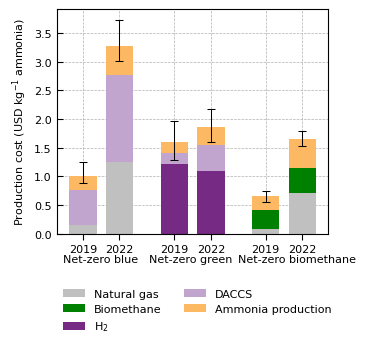

In [31]:
width = 0.3

fig, axs = plt.subplots(1, 1, figsize=(fig_length[1]*1, fig_height*0.3), zorder=3)

segments = ['Natural gas',
            'Biomethane',
            'H2',
            'DACCS',
            'Ammonia production']
segment_color=['silver',
               'green',
               '#762a83',
               '#c2a5cf',
               '#fdb863']
segment_label = ['Natural gas',
                 'Biomethane',
                 'H$_2$',
                 'DACCS',
                 'Ammonia production']

# 2019
x_2019 = np.arange(len(net_zero_ammonia_RER_costs_2019.columns))
bottom = np.zeros(len(x_2019))
for i in range(len(segments)):
    segment_values = net_zero_ammonia_RER_costs_2019.loc[segments[i]].values
    axs.bar(x_2019, segment_values, width=width, bottom=bottom, color=segment_color[i], zorder=2)
    bottom += segment_values
axs.errorbar(x_2019, net_zero_ammonia_RER_costs_2019.loc['Total'],
             yerr=[net_zero_ammonia_RER_costs_2019.loc['Total'] - net_zero_ammonia_RER_costs_2019.loc['Min'],
                   net_zero_ammonia_RER_costs_2019.loc['Max'] - net_zero_ammonia_RER_costs_2019.loc['Total']],
                   color='black', capsize=3, capthick=0.75, linewidth=0.75, fmt='None')

# 2022
x_2022 = x_2019 + width + 0.1
bottom = np.zeros(len(x_2022))
for i in range(len(segments)):
    segment_values = net_zero_ammonia_RER_costs_2022.loc[segments[i]].values
    axs.bar(x_2022, segment_values, width=width, bottom=bottom, color=segment_color[i], zorder=2)
    bottom += segment_values
axs.errorbar(x_2022, net_zero_ammonia_RER_costs_2022.loc['Total'],
             yerr=[net_zero_ammonia_RER_costs_2022.loc['Total'] - net_zero_ammonia_RER_costs_2022.loc['Min'],
                   net_zero_ammonia_RER_costs_2022.loc['Max'] - net_zero_ammonia_RER_costs_2022.loc['Total']],
                   color='black', capsize=3, capthick=0.75, linewidth=0.75, fmt='None')

"""
text_pos = [1.6, 1.9, 0.9]
for sc in [0,1,2]:
    cost_2019 = net_zero_ammonia_RER_costs_2019.iloc[5].values[sc]
    cost_2022 = net_zero_ammonia_RER_costs_2022.iloc[5].values[sc]
    increase = cost_2022 / cost_2019
    print(cost_2019, cost_2022, increase)
    axs.annotate(text='', xy=(sc, cost_2022), xytext=(sc, cost_2019), arrowprops=dict(arrowstyle='->', color='black'))
    axs.text(sc, text_pos[sc], "x" + str(round(increase,1)), ha="center", va="center", rotation=0, size=fontsize_axs, bbox=dict(boxstyle="circle,pad=0.3", fc="lightgrey", ec="None", lw=2))
"""


axs.grid(ls='--', lw=0.5, zorder=0)
axs.set_xticks([0, 0.4, 1, 1.4, 2, 2.4])
axs.set_xticklabels(['2019', '2022', '2019', '2022', '2019', '2022'], rotation=0, ha="center", fontsize=fontsize_axs)

axs.tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
axs.tick_params(axis='x', which='major', direction='out', length=4, labelsize=fontsize_axs)
#axs.set_xticklabels(NET_ZERO_SCENARIOS, rotation=30, ha="right", fontsize=fontsize_axs)
axs.set_ylabel('Production cost (USD kg$^{-1}$ ammonia)', fontsize=fontsize_label)

axs.annotate(text='Net-zero blue', xy=(0, 0), xytext=(-0.22, -0.5), fontsize=fontsize_axs)
axs.annotate(text='Net-zero green', xy=(0, 0), xytext=(0.72, -0.5), fontsize=fontsize_axs)
axs.annotate(text='Net-zero biomethane', xy=(0, 0), xytext=(1.7, -0.5), fontsize=fontsize_axs)

# LEGEND
patches = []
for pat in range(len(segment_label)):
    patches.append(Patch(facecolor=segment_color[pat], label=segment_label[pat]))

axs.legend(handles=patches,
           bbox_to_anchor=(1.05,-0.2),
            ncol=2, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

plt.savefig(FIG_EXPORT_DIR / "fig6_cost_netzero_ammonia.jpg", dpi=600, bbox_inches='tight')
plt.savefig(FIG_EXPORT_DIR / "fig6_cost_netzero_ammonia.pdf", dpi=600, bbox_inches='tight')

## Sensitivity analysis

**Perturbation analysis of carbon footprint of ammonia production in the Biomethane + CCS Upgrading/Syngas/FlueGas scenario**

In [253]:
# Conisder only sensitivity ratios greater than 0.1 as absolute value are presented.
perturbation_analysis_cutoff = perturbation_analysis[abs(perturbation_analysis['sensitivity ratio']) >= 0.1]
perturbation_analysis_cutoff = perturbation_analysis_cutoff.sort_values(by="sensitivity ratio", ascending=True)
perturbation_analysis_cutoff

,activity,parameter,param default,param plus 20,param minus 20,lca default,lca plus 20,lca minus 20,sensitivity ratio
Scenario,,,,,,,,,
59,"anaerobic digestion of animal manure, with bio...","Carbon dioxide, non-fossil",0.525,0.630,0.420,-1.177,-1.120,-1.234,-0.241
60,"anaerobic digestion of animal manure, with bio...","Methane, non-fossil",0.016,0.019,0.013,-1.177,-1.124,-1.229,-0.222
108,"anaerobic digestion of agricultural residues, ...","Carbon dioxide, non-fossil",0.525,0.630,0.420,-1.177,-1.134,-1.219,-0.181
109,"anaerobic digestion of agricultural residues, ...","Methane, non-fossil",0.016,0.019,0.013,-1.177,-1.138,-1.216,-0.167
41,"anaerobic digestion of sequential crop, with b...","Carbon dioxide, non-fossil",0.525,0.630,0.420,-1.177,-1.139,-1.214,-0.158
42,"anaerobic digestion of sequential crop, with b...","Methane, non-fossil",0.016,0.019,0.013,-1.177,-1.142,-1.211,-0.146
134,"ammonia production, liquid, bio-ammonia from b...","market group for electricity, low voltage",0.432,0.519,0.346,-1.177,-1.145,-1.209,-0.135
97,"biogas upgrading to biomethane, water scrubbin...","Methane, non-fossil",0.014,0.017,0.011,-1.177,-1.152,-1.202,-0.105
21,"treatment of biowaste by anaerobic digestion, ...","Carbon dioxide, in air",1.983,2.379,1.586,-1.177,-1.210,-1.143,0.142


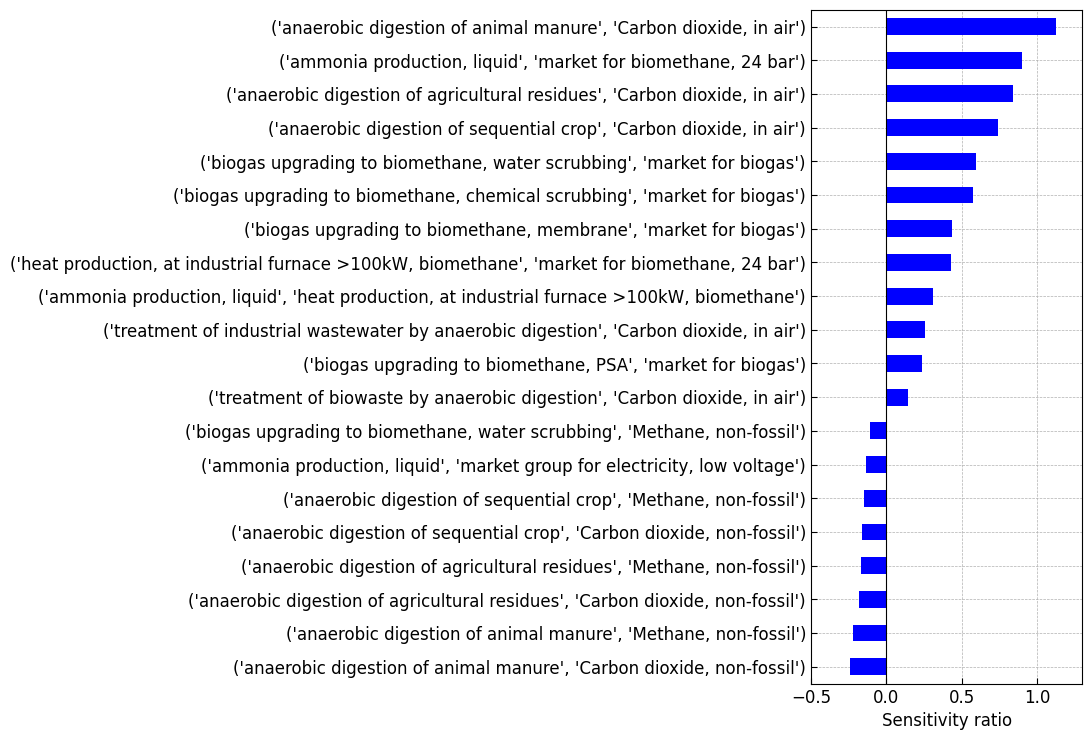

In [293]:
fig, axs = plt.subplots(1, 1, figsize=(fig_length[1], fig_height*0.9), zorder=3)

perturbation_analysis_cutoff = perturbation_analysis_cutoff.sort_values(by="sensitivity ratio", ascending=True)
perturbation_analysis_cutoff["sensitivity ratio"].plot.barh(ax=axs, x="sensitivity ratio", y="labels", fontsize=fontsize_axs, lw=2, color="blue", legend=False, zorder=2)

# Add labels for activity-parameter pairs:
labels = list(zip(perturbation_analysis_cutoff['activity'], perturbation_analysis_cutoff['parameter']))
labels = [(i[0].replace(" w/ CCS, syngas w/ CCS, heating w/ CCS", ""), i[1]) for i in labels]
labels = [(i[0].replace(" w/ CCS", ""), i[1]) for i in labels]
labels = [(i[0].replace(", heating", ""), i[1]) for i in labels]
labels = [(i[0].replace(", bio-ammonia from biomethane", ""), i[1]) for i in labels]
labels = [(i[0].replace(", with biogenic carbon uptake", ""), i[1]) for i in labels]
labels = [(i[0].replace(", cut-off with biogenic carbon uptake", ""), i[1]) for i in labels]
labels = [(i[0].replace("pressure swing adsorption", "PSA"), i[1]) for i in labels]
labels = [(i[0], i[1].replace(" w/ CCS", "")) for i in labels]
labels = [(i[0], i[1].replace(", heating", "")) for i in labels]
labels = [(i[0], i[1].replace(" w/ CCS, heating w/ CCS", "")) for i in labels]
labels = [(i[0], i[1].replace(", sustainable feedstocks", "")) for i in labels]
axs.set_yticklabels(labels)
axs.set_ylabel("")


axs.set_xlabel("Sensitivity ratio", fontsize=12)

axs.tick_params(axis='y', which='major', direction='in', length=4, labelsize=12)
axs.tick_params(axis='x', which='major', direction='in', length=4, labelsize=12)

axs.axvline(x=0, ls='-', color='black', lw=0.8, zorder=2)
axs.grid(ls='--', lw=0.5, zorder=0)
axs.set_xlim(-0.5, 1.3)

plt.savefig(FIG_EXPORT_DIR / "SI_perturbation_analysis", dpi=600, bbox_inches='tight')

**Sensitivity of carbon footprint of ammonia to methane leakage rate**

In [9]:
# Substitute scenario labels by increase interval
intervals = np.arange(0+1, len(SA_carbonfootprint_methane_leakage.columns)/10+1, 0.1)
SA_carbonfootprint_methane_leakage.columns = intervals[:len(SA_carbonfootprint_methane_leakage.columns)]

SA_carbonfootprint_methane_leakage

,1.000,1.100,1.200,1.300,1.400,1.500,1.600,1.700,1.800,1.900,...,2.100,2.200,2.300,2.400,2.500,2.600,2.700,2.800,2.900,3.000
Scenario,,,,,,,,,,,,,,,,,,,,,
Biomethane + CCS Upgrading,0.578,0.664,0.750,0.838,0.925,1.014,1.103,1.192,1.282,1.373,...,1.557,1.650,1.743,1.837,1.932,2.027,2.123,2.219,2.316,2.414
Biomethane,1.804,1.889,1.976,2.063,2.150,2.239,2.328,2.417,2.507,2.598,...,2.781,2.873,2.967,3.060,3.155,3.250,3.345,3.442,3.539,3.636
Biomethane + CCS Syngas,0.483,0.569,0.655,0.742,0.830,0.918,1.007,1.096,1.186,1.277,...,1.460,1.553,1.646,1.740,1.834,1.929,2.025,2.121,2.218,2.316
Biomethane + CCS Upgrading + CCS Syngas + CCS Heating,-1.181,-1.095,-1.008,-0.921,-0.833,-0.745,-0.656,-0.566,-0.476,-0.385,...,-0.202,-0.109,-0.016,0.078,0.173,0.268,0.364,0.461,0.558,0.655
Biomethane + CCS Syngas + CCS Heating,0.045,0.131,0.217,0.304,0.392,0.480,0.569,0.658,0.748,0.839,...,1.022,1.115,1.208,1.302,1.396,1.491,1.587,1.683,1.780,1.877
Biomethane + CCS Upgrading + CCS Syngas,-0.743,-0.657,-0.570,-0.483,-0.395,-0.307,-0.218,-0.128,-0.038,0.053,...,0.236,0.329,0.422,0.516,0.611,0.706,0.802,0.899,0.996,1.094


In [20]:
# Compute cutoff methane leakage:
cutoff_methane_leakage = {}
for index, row in SA_carbonfootprint_methane_leakage.iterrows():
    cutoff_methane_leakage.update(
        {index: results_analysis.interpolate(SA_carbonfootprint_methane_leakage.loc[index].to_dict())
        }
    )

cutoff_methane_leakage

{'Biomethane + CCS Upgrading': nan,
 'Biomethane': nan,
 'Biomethane + CCS Syngas': nan,
 'Biomethane + CCS Upgrading + CCS Syngas + CCS Heating': 2.316626403881221,
 'Biomethane + CCS Syngas + CCS Heating': nan,
 'Biomethane + CCS Upgrading + CCS Syngas': 1.8418774289167332}

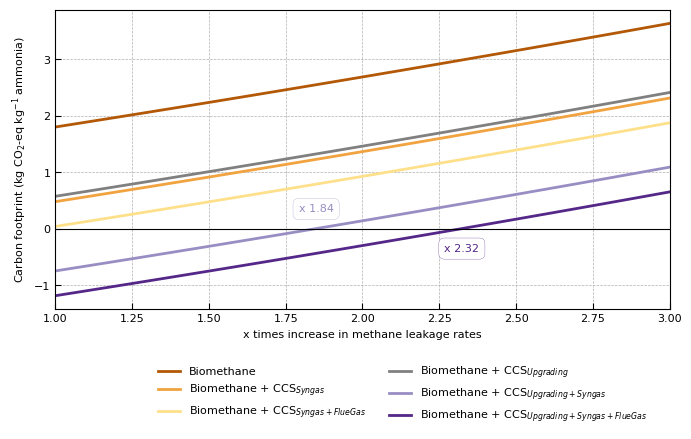

In [114]:
scenarios_color = {
    "Biomethane":                                              "#b35806",
    'Biomethane + CCS Syngas':                                 "#f1a340",
    'Biomethane + CCS Syngas + CCS Heating':                   "#fee08b",
    'Biomethane + CCS Upgrading':                              "grey",
    'Biomethane + CCS Upgrading + CCS Syngas':                 "#998ec3",
    "Biomethane + CCS Upgrading + CCS Syngas + CCS Heating":   "#542788",
}

fig, axs = plt.subplots(1, 1, figsize=(fig_length[2]*1.1, fig_height*0.4), zorder=3)

SA_carbonfootprint_methane_leakage = SA_carbonfootprint_methane_leakage.reindex(scenarios_color.keys())
SA_carbonfootprint_methane_leakage.T.plot(ax=axs, fontsize=fontsize_axs, lw=2, color=scenarios_color.values(), legend=False, zorder=2)
axs.axhline(y=0, ls='-', color='black', lw=0.8, zorder=2)
axs.grid(ls='--', lw=0.5, zorder=0)
axs.set_xlim(1, 3)

for scenario in cutoff_methane_leakage:
    cutoff = cutoff_methane_leakage[scenario]

    if np.isnan(cutoff):
        pass
    else:
        if cutoff > 2:
            x_pos = -0.4
        else:
            x_pos = 0.3

        axs.text(cutoff_methane_leakage[scenario]-0.05, x_pos, "x " + str(round(cutoff_methane_leakage[scenario], 2)), fontsize=fontsize_axs, color=scenarios_color[scenario],
                bbox=dict(facecolor='white', edgecolor=scenarios_color[scenario], linewidth=0.2, boxstyle='round,pad=0.5'))

        plt.annotate('', xy=(x_pos, 2.6), xytext=(x_pos, 2.6), arrowprops=dict(facecolor='black', arrowstyle='->'))

axs.tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
axs.tick_params(axis='x', which='major', direction='in', length=4, labelsize=fontsize_axs)

axs.set_ylabel('Carbon footprint (kg CO$_2$-eq kg$^{-1}$ ammonia)', fontsize=fontsize_label)
axs.set_xlabel('x times increase in methane leakage rates', fontsize=fontsize_label)

# Legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles, labels=SCENARIO_LABEL[4:], bbox_to_anchor=(0.98,-0.15), ncol=2, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

plt.savefig(FIG_EXPORT_DIR / "SI_SA_methane_leakage_carbonfootprint", dpi=600, bbox_inches='tight')

**Sensitivity of carbon footprint of ammonia to biogas upgrading technology**

In [163]:
SA_carbonfootprint_upgradingtechnology

,default,SA_Upgrading_WaterScrubbing,SA_Upgrading_ChemicalScrubbing,SA_Upgrading_Membrane,SA_Upgrading_PSA
Scenario,,,,,
Biomethane,1.808,1.881,1.715,1.698,2.049
Biomethane + CCS Upgrading + CCS Syngas,-0.739,-0.652,-0.870,-0.836,-0.458
Biomethane + CCS Upgrading + CCS Syngas + CCS Heating,-1.177,-1.091,-1.308,-1.274,-0.896
Biomethane + CCS Syngas,0.487,0.560,0.394,0.378,0.728
Biomethane + CCS Upgrading,0.582,0.668,0.450,0.485,0.862
Biomethane + CCS Syngas + CCS Heating,0.049,0.122,-0.044,-0.060,0.290


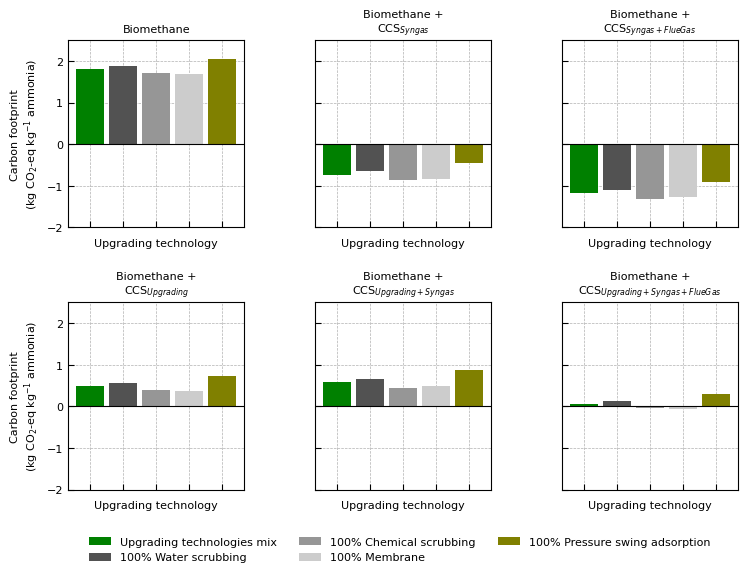

In [214]:
UPGRADING_COLORS = ['green', "#525252", '#969696', '#cccccc', 'olive']
UPGRADING_SCENARIOS = [
    "Upgrading technologies mix",
    "100% Water scrubbing",
    "100% Chemical scrubbing",
    "100% Membrane",
    "100% Pressure swing adsorption"
]
width = 0.85

fig, axs = plt.subplots(2, 3, figsize=(fig_length[2]*1.2, fig_height*0.6), sharey=True,  zorder=3)

count_col = 0
count_rows = 0
for sc in range(len(SA_carbonfootprint_upgradingtechnology.index)):
    scenario = SA_carbonfootprint_upgradingtechnology.index[sc]
    axs[count_rows,count_col].set_title(SCENARIO_LABEL_MAPS[sc], loc='center', fontsize=fontsize_axs)

    SA_carbonfootprint_upgradingtechnology.loc[scenario].plot.bar(ax=axs[count_rows,count_col], width=width, color=UPGRADING_COLORS, linewidth=spineline_width, zorder=2, legend=False)
    
    axs[count_rows,count_col].axhline(y=0, ls='-', color='black', lw=0.8, zorder=2)
    axs[count_rows,count_col].grid(ls='--', lw=0.5, zorder=0)
    axs[count_rows,count_col].set_xticklabels('')
    #axs.set_xticklabels('')

    axs[count_rows,count_col].tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
    axs[count_rows,count_col].tick_params(axis='x', which='major', direction='in', length=4, labelsize=fontsize_axs)

    axs[count_rows,count_col].set_ylim(-2, 2.5)

    axs[count_rows,count_col].set_ylabel('Carbon footprint\n(kg CO$_2$-eq kg$^{-1}$ ammonia)', fontsize=fontsize_label)
    axs[count_rows,count_col].set_xlabel('Upgrading technology', fontsize=fontsize_label)

    count_col += 1
    if sc == 2:
        count_col = 0
        count_rows = 1

# LEGEND
patches = []
for pat in range(len(UPGRADING_SCENARIOS)):
    patches.append(Patch(facecolor=UPGRADING_COLORS[pat], label=UPGRADING_SCENARIOS[pat]))

axs[1,1].legend(handles=patches,
           bbox_to_anchor=(2.3,-0.2),
            ncol=3, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.savefig(FIG_EXPORT_DIR / "SI_SA_upgradingtechnology_carbonfootprint", dpi=600, bbox_inches='tight')

**Sensitivity of net-zero scenarios impacts to upgrading technologies**

In [391]:
SA_SCENARIOS_NAME = {"Net-zero biomethane": "Net-zero biomethane / Upgrading technologies mix",
                     'SA_Upgrading_WaterScrubbing': "Net-zero biomethane / 100% Water scrubbing",
                     'SA_Upgrading_ChemicalScrubbing': "Net-zero biomethane / 100% Chemical scrubbing",
                     'SA_Upgrading_Membrane': "Net-zero biomethane / 100% Membrane",
                     'SA_Upgrading_PSA': "Net-zero biomethane / 100% Pressure swing adsorption",
                     }

SCENARIOS_ORDER = ['Net-zero blue', 'Net-zero green'] + list(SA_SCENARIOS_NAME.values())

In [392]:
SA_netzero_ammonia_LCIA_relative.rename(columns=SA_SCENARIOS_NAME, inplace=True)
SA_netzero_ammonia_LCIA_relative = SA_netzero_ammonia_LCIA_relative[SCENARIOS_ORDER]

SA_netzero_ammonia_LCIA_relative

,Net-zero blue,Net-zero green,Net-zero biomethane / Upgrading technologies mix,Net-zero biomethane / 100% Water scrubbing,Net-zero biomethane / 100% Chemical scrubbing,Net-zero biomethane / 100% Membrane,Net-zero biomethane / 100% Pressure swing adsorption
Acidification,0.568,0.356,0.634,0.453,1.000,0.450,0.457
"Eutrophication, freshwater",1.000,0.392,0.460,0.474,0.438,0.462,0.484
"Eutrophication, marine",0.588,0.282,0.943,0.923,1.000,0.874,0.979
"Eutrophication, terrestrial",0.432,0.291,0.593,0.391,1.000,0.390,0.392
Photochemical oxidant formation,0.053,0.018,0.356,0.037,1.000,0.037,0.037
Particulate matter formation,0.461,0.364,0.609,0.416,1.000,0.412,0.420
Ozone depletion,1.000,0.132,0.747,0.731,0.777,0.745,0.711
"Ecotoxicity, freshwater",1.000,0.626,0.821,0.776,0.906,0.772,0.799
"Human toxicity, carcinogenic",0.600,0.679,0.634,0.453,1.000,0.449,0.457
"Human toxicity, non-carcinogenic",1.000,0.648,0.667,0.609,0.789,0.593,0.627


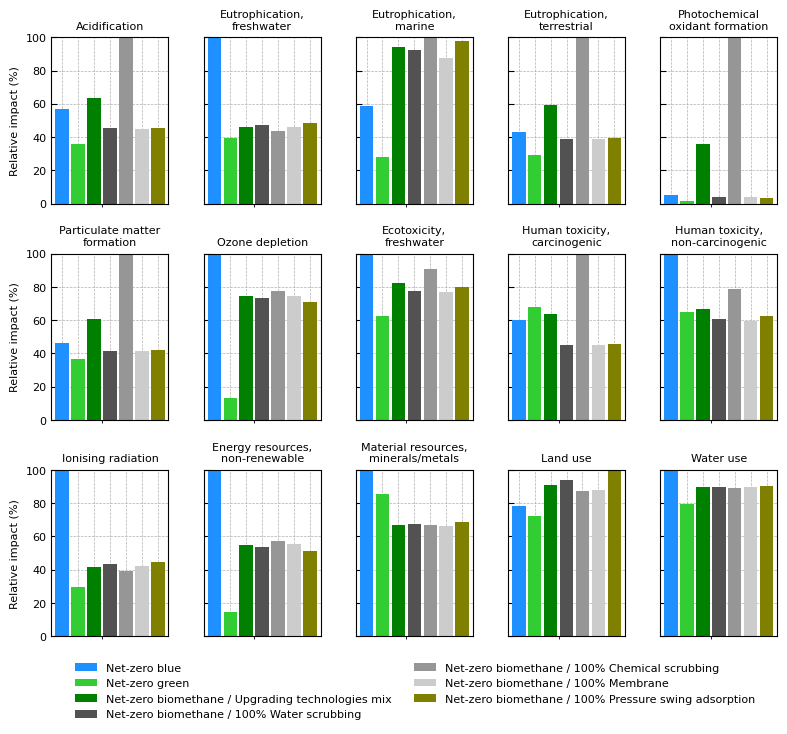

In [393]:
width = 0.85
SCENARIO_LABELS = SA_netzero_ammonia_LCIA_relative.columns
UPGRADING_COLORS = ['dodgerblue', 'limegreen', 'green', "#525252", '#969696', '#cccccc', 'olive']

fig, axs = plt.subplots(3, 5, figsize=(fig_length[2]*1.3, fig_height*0.8), sharey=True, sharex=True, zorder=3)

impact_count = 0
for row in range(3):
    axs[row,0].set_ylabel('Relative impact (%)', fontsize=fontsize_label)
    for col in range(5):
        SA_netzero_ammonia_LCIA_relative.iloc[impact_count].multiply(100).plot.bar(ax=axs[row,col],
                                                                                     width=width, color=UPGRADING_COLORS, linewidth=spineline_width, zorder=2)
        
        axs[row,col].set_title(IMPACT_TITLES[impact_count], loc='center', fontsize=fontsize_axs)

        axs[row,col].grid(ls='--', lw=0.5, zorder=0)
  
        axs[row,col].tick_params(axis='y', which='major', direction='in', length=4, labelsize=fontsize_axs)
        axs[row,col].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
        axs[row,col].set_ylim(0, 100)
        axs[row,col].set_xticklabels([], ha="right", fontsize=fontsize_axs)
        impact_count += 1

# LEGEND
patches = []
for pat in range(len(SCENARIO_LABELS)):
    patches.append(Patch(facecolor=UPGRADING_COLORS[pat], label=SCENARIO_LABELS[pat]))

axs[2,2].legend(handles=patches,
           bbox_to_anchor=(3.5,-0.1),
            ncol=2, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig(FIG_EXPORT_DIR / "SI_SA_netzero_upgrading_tech", dpi=600, bbox_inches='tight')

**Carbon footprint of ammonia production considering N2O emissions from usage**

In [339]:
SA_carbonfootprint_use

,Fertilizer low,Fertilizer high,Fuel
Natural gas,4.445,8.314,4.093
Natural gas + CCS Syngas,3.124,6.994,2.772
Natural gas + CCS Syngas + CCS Heating,2.683,6.552,2.331
Green H2,2.040,5.909,1.688
Biomethane,3.566,7.436,3.215
Biomethane + CCS Syngas,2.246,6.115,1.894
Biomethane + CCS Syngas + CCS Heating,1.808,5.677,1.456
Biomethane + CCS Upgrading,2.341,6.210,1.989
Biomethane + CCS Upgrading + CCS Syngas,1.020,4.890,0.668
Biomethane + CCS Upgrading + CCS Syngas + CCS Heating,0.582,4.452,0.230


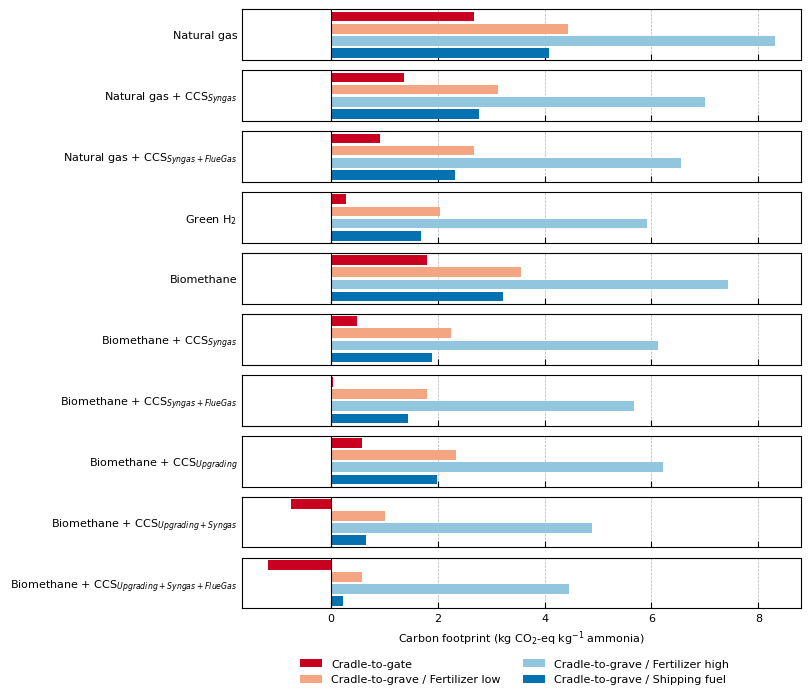

In [400]:
system_color = ["#ca0020", "#f4a582", "#92c5de", "#0571b0"]
width = 0.85

fig, axs = plt.subplots(len(carbon_footprint_ammonia_RER.columns), 1, figsize=(fig_length[2], fig_height*0.8), sharex=True, zorder=3)

count_ax = 0
for col in carbon_footprint_ammonia_RER.columns:
    axs[count_ax].barh(0,carbon_footprint_ammonia_RER.loc["Total"][col], color=system_color[0], zorder=2)
    axs[count_ax].barh(1,SA_carbonfootprint_use.loc[col]["Fertilizer low"], color=system_color[1],zorder=2)
    axs[count_ax].barh(2,SA_carbonfootprint_use.loc[col]["Fertilizer high"], color=system_color[2],zorder=2)
    axs[count_ax].barh(3,SA_carbonfootprint_use.loc[col]["Fuel"], color=system_color[3],zorder=2)

    axs[count_ax].invert_yaxis()

    axs[count_ax].axvline(x=0, ls='-', color='black', lw=0.8, zorder=2)
    axs[count_ax].grid(axis="x", ls='--', lw=0.5, zorder=0)

    axs[count_ax].tick_params(axis='y', which='major', direction='in', length=0, labelsize=fontsize_axs)
    axs[count_ax].tick_params(axis='x', which='major', direction='in', length=4, labelsize=fontsize_axs)

    axs[count_ax].set_yticks([1.5])
    axs[count_ax].set_yticklabels([SCENARIO_LABEL[count_ax]])
    
  #  axs[count_ax].xaxis.set_major_locator(ticker.MultipleLocator(0.5))

    count_ax += 1

axs[9].set_xlabel('Carbon footprint (kg CO$_2$-eq kg$^{-1}$ ammonia)', fontsize=fontsize_label) 

patches = []
legend_labels = ["Cradle-to-gate", "Cradle-to-grave / Fertilizer low", "Cradle-to-grave / Fertilizer high", "Cradle-to-grave / Shipping fuel"]
for pat in range(len(legend_labels)):
    patches.append(Patch(facecolor=system_color[pat], label=legend_labels[pat]))

axs[9].legend(handles=patches,
           bbox_to_anchor=(0.89,-0.8),
            ncol=2, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

plt.savefig(FIG_EXPORT_DIR / "SI_SA_carbon_footprint_cradletograve", dpi=600, bbox_inches='tight')